
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("placement.csv")
df.head()

## Data Preporessing

# Drop the first column of the DataFrame
df = df.iloc[:, 1:]

In [20]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## EDA

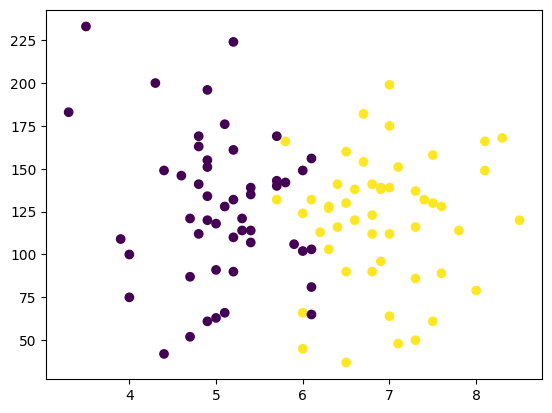

In [22]:
plt.scatter(df['cgpa'] , df['iq'] , c = df['placement'])

In [23]:
# Separate independent and dependent variables
# x will hold all the independent variables
x = df.iloc[:, 0:2]  # Selecting columns 0 and 1 as independent variables
# y will hold the dependent variable
y = df.iloc[:, -1]  # Selecting the last column as the dependent variable

In [24]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


## Train Test Split

In [25]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [26]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with a test size of 10%
# The function returns four arrays: x_train, x_test, y_train, and y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Scale the values

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# This line of code initializes an instance of the StandardScaler class from the sklearn library.
# The StandardScaler is a technique used to standardize features by removing the mean and scaling to unit variance.
# It is often used in machine learning pipelines to ensure that all features are on the same scale, 
# which can improve the performance of some algorithms.
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(x_train)

In [30]:
x_test = scaler.transform(x_test)

# Train the Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Create an instance of the LogisticRegression class, which is a type of supervised learning algorithm used for classification problems.
clf = LogisticRegression()

# Train the model using the training data (X_train) and the corresponding labels (y_train).
# The fit method is used to train the model, and it takes the training data and labels as input.
clf.fit(X_train, y_train)

LogisticRegression()

In [33]:

y_pred = clf.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

0.9

In [37]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

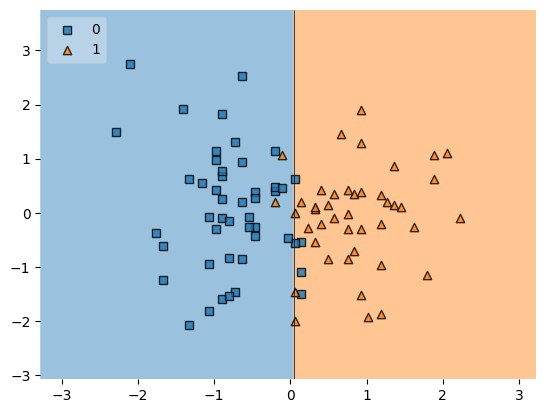

In [38]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [39]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))